<a href="https://colab.research.google.com/github/tushar821999/Pandas_Library/blob/master/Cloud_SLA_Voilation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DataSet Used***

Active Link : [cloud_server_dataset](https://github.com/tushar821999/Pandas_Library/blob/master/Data%20Set/cloud_server.csv) 

In [0]:
import pandas as pd
df = pd.read_csv('/content/cloud_server.csv')
print(df)

     Date_Stamp Time_Stamp Server_Alpha_Status  Server_Numerical_Status
0    2019-12-13    1:10:14           server up                        1
1    2019-12-13    1:10:14           server up                        1
2    2019-12-13    1:10:15           server up                        1
3    2019-12-13    1:10:15           server up                        1
4    2019-12-13    1:10:16           server up                        1
..          ...        ...                 ...                      ...
728  2019-12-14   12:33:35           server up                        1
729  2019-12-14   12:33:36           server up                        1
730  2019-12-14   12:33:36           server up                        1
731  2019-12-14   12:33:37           server up                        1
732  2019-12-14   12:33:38           server up                        1

[733 rows x 4 columns]


In [0]:
import matplotlib.pyplot as plt
server_status = df.groupby('Server_Alpha_Status')['Server_Numerical_Status'].count()
print(server_status)

Server_Alpha_Status
server down    585
server up      148
Name: Server_Numerical_Status, dtype: int64


In [0]:
server_status_unique = list(df.Server_Alpha_Status.unique())
server_status = server_status.reindex(server_status_unique,axis=0)
print(server_status)

Server_Alpha_Status
server up      148
server down    585
Name: Server_Numerical_Status, dtype: int64


In [0]:
server_status = server_status.to_frame()
print(server_status.head(12))
server_status.reset_index(level=0,inplace=True)

                     Server_Numerical_Status
Server_Alpha_Status                         
server up                                148
server down                              585


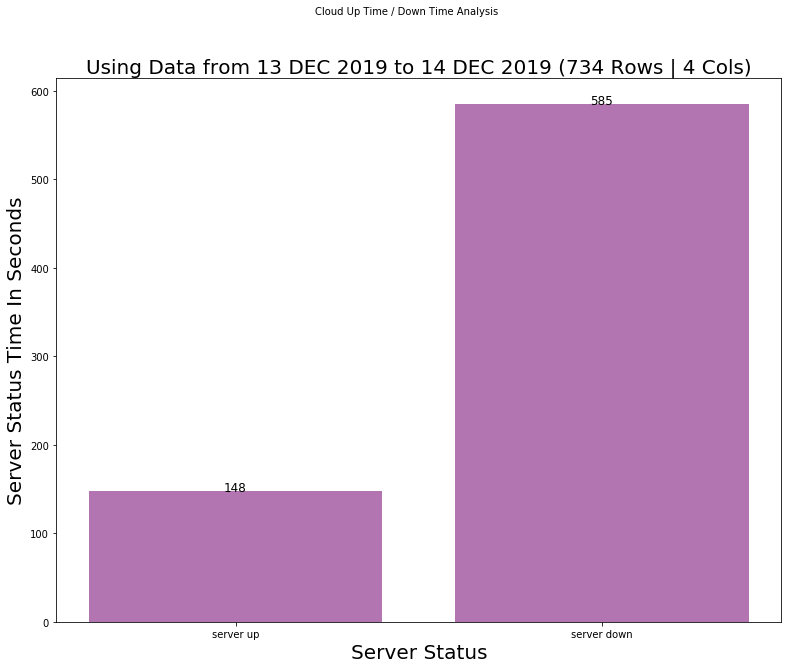

In [0]:
plt.figure(figsize=(13,10))
plt.bar(server_status['Server_Alpha_Status'],server_status['Server_Numerical_Status'],color=(0.5,0.1,0.5,0.6))
plt.suptitle('Cloud Up Time / Down Time Analysis',fontsize=10)
plt.title('Using Data from 13 DEC 2019 to 14 DEC 2019 (734 Rows | 4 Cols)',fontsize=20)
plt.xlabel('Server Status',fontsize=20)
plt.ylabel('Server Status Time In Seconds',fontsize=20)

for i,num in enumerate(server_status['Server_Numerical_Status']):
  plt.text(i,num,num,ha='center',fontsize=12)